Setting up environment

In [87]:

!pip3 install micromlgen
!pip3 install pandas numpy matplotlib
!pip3 install --upgrade tensorflow==2.3.0rc1

You should consider upgrading via the 'C:\Users\ronan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ronan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0rc1 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERROR: No matching distribution found for tensorflow==2.3.0rc1
You should consider upgrading via the 'C:\Users\ronan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [88]:
import numpy
numpy.version.version
import tensorflow as tf


Facetouch simulations were collected from Arduino using the Arduino Nano 33 BLE sense and stored in a .csv file which I will use to train and classify the model

In [89]:
import pandas as pd
df = pd.read_csv('chew20.csv', low_memory=False)
df.head()

,aX,aY,aZ,gX,gY,gZ
0,0.809,0.627,0.019,5.310,5.127,3.662
1,0.797,0.596,0.025,-1.465,2.014,5.737
2,0.790,0.605,0.009,-3.235,-3.418,8.240
3,0.811,0.598,0.001,-1.465,-6.348,9.949
4,0.810,0.587,-0.005,-2.258,-6.775,10.132


In [90]:
import pandas as pd
df1 = pd.read_csv('10talking.csv', low_memory=False)
df1.head()

,aX,aY,aZ,gX,gY,gZ
0,0.803,0.683,-0.034,-0.366,-4.517,-0.977
1,0.765,0.671,-0.027,0.854,-3.662,1.343
2,0.760,0.637,-0.022,0.488,-3.296,2.991
3,0.763,0.622,-0.010,0.427,-2.991,3.052
4,0.750,0.611,-0.006,0.000,-3.235,0.305


I then plotted the data to visualse each of the different gestures

C:\Users\ronan\AppData\Local\Temp\ipykernel_1820\3217031525.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\ronan\AppData\Local\Temp\ipykernel_1820\3217031525.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\ronan\AppData\Local\Temp\ipykernel_1820\3217031525.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


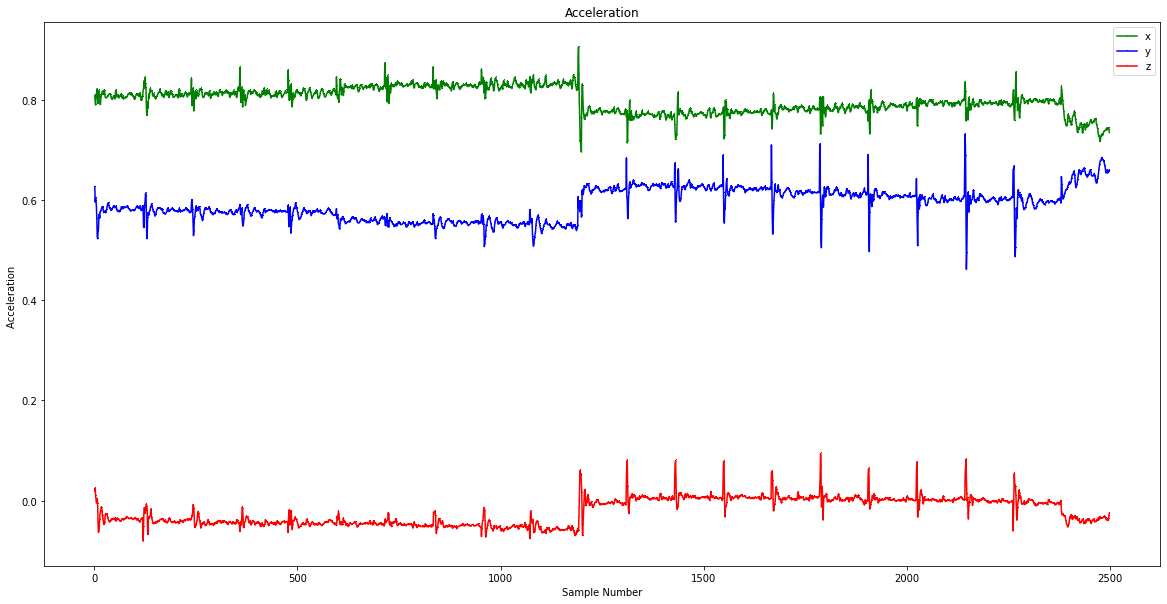

C:\Users\ronan\AppData\Local\Temp\ipykernel_1820\3217031525.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\ronan\AppData\Local\Temp\ipykernel_1820\3217031525.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\ronan\AppData\Local\Temp\ipykernel_1820\3217031525.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


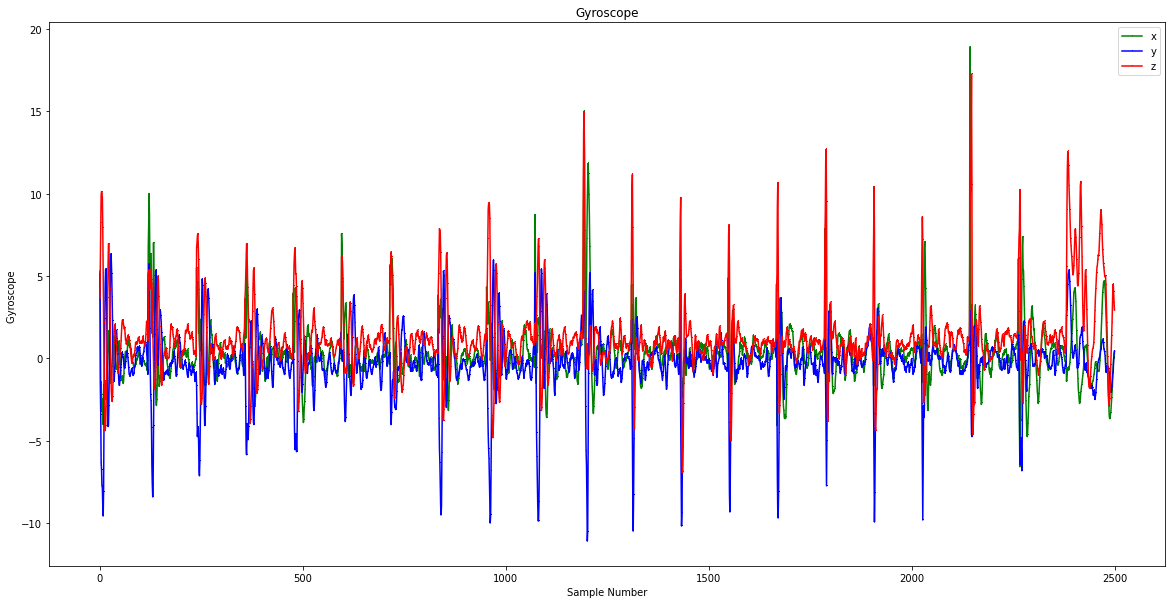

In [91]:
import matplotlib.pyplot as plt
index = range(1, len(df['aX']) + 1)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample Number")
plt.ylabel("Acceleration ")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample Number")
plt.ylabel("Gyroscope ")
plt.legend()
plt.show()

C:\Users\ronan\AppData\Local\Temp\ipykernel_1820\1393999084.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df1['aX'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\ronan\AppData\Local\Temp\ipykernel_1820\1393999084.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df1['aY'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\ronan\AppData\Local\Temp\ipykernel_1820\1393999084.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df1['aZ'], 'r.', label='z', linestyle='solid', marker=',')


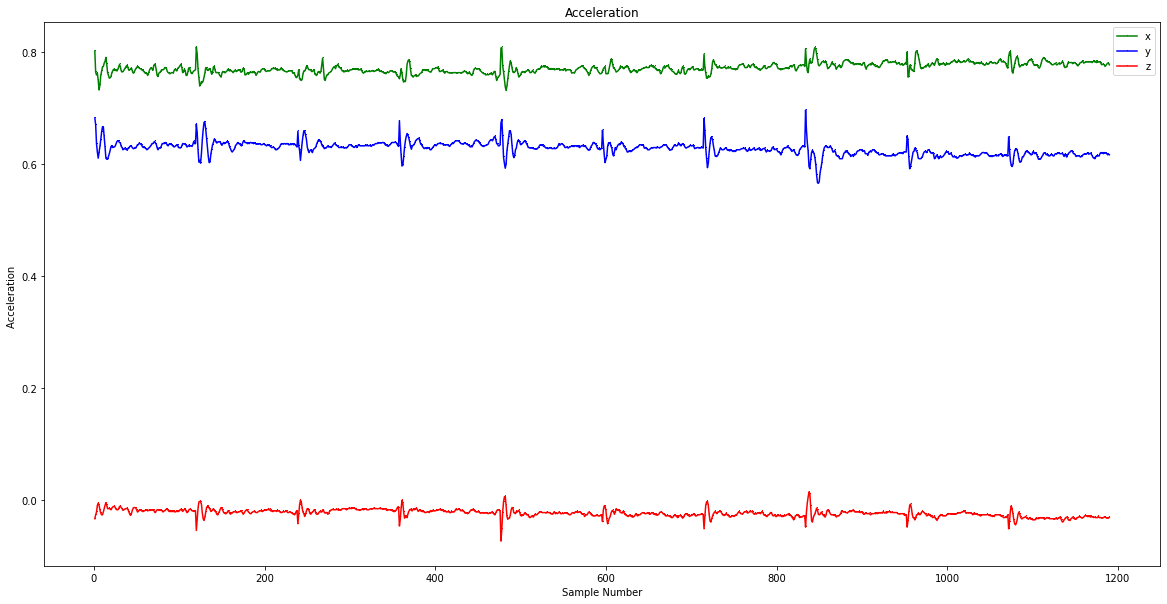

C:\Users\ronan\AppData\Local\Temp\ipykernel_1820\1393999084.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df1['gX'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\ronan\AppData\Local\Temp\ipykernel_1820\1393999084.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df1['gY'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\ronan\AppData\Local\Temp\ipykernel_1820\1393999084.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df1['gZ'], 'r.', label='z', linestyle='solid', marker=',')


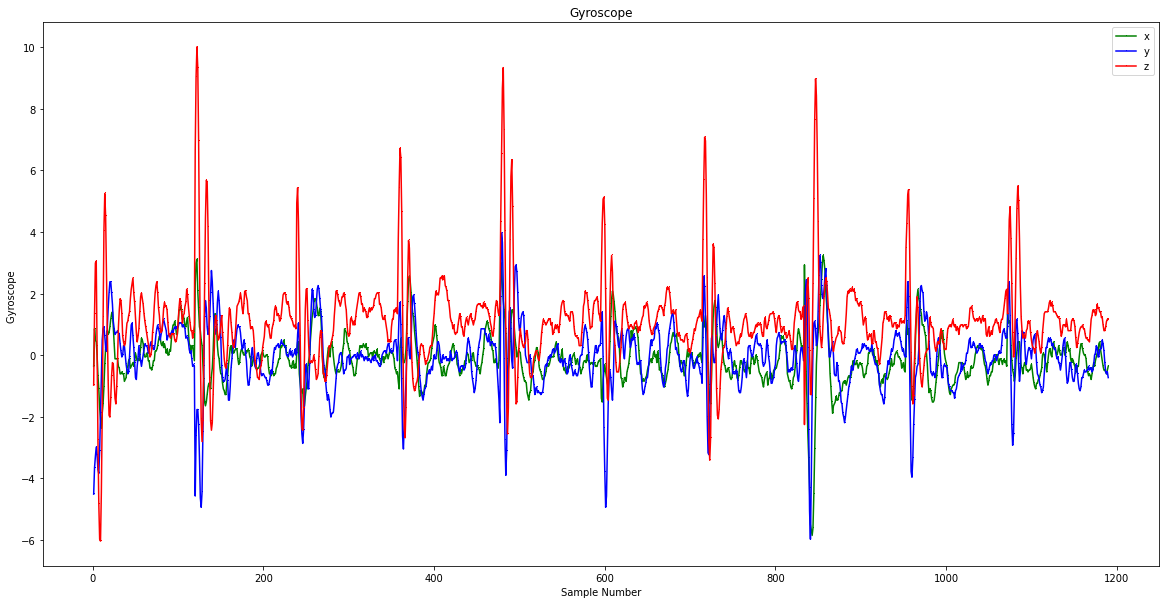

In [92]:
import matplotlib.pyplot as plt
index = range(1, len(df1['aX']) + 1)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(index, df1['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df1['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df1['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample Number")
plt.ylabel("Acceleration ")
plt.legend()
plt.show()

plt.plot(index, df1['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df1['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df1['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample Number")
plt.ylabel("Gyroscope ")
plt.legend()
plt.show()

I then parsed the CSV file and created a Facetouch indentification list called FACETOUCH which was used to classify each face touch and print the number of recordings that were found

In [94]:
import numpy as np
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
GESTURES = [
    "chew20",
    "10talking",
]

SAMPLES_PER_GESTURE = 119
NUM_GESTURES = len(GESTURES)

ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)
inputs = []
outputs = []

for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv(gesture + ".csv", low_memory=False)
  
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j

      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)

inputs = np.array(inputs)
outputs = np.array(outputs)


Processing index 0 for gesture 'chew20'.
	There are 21 recordings of the chew20 gesture.
Processing index 1 for gesture '10talking'.
	There are 10 recordings of the 10talking gesture.


I then split the data into training, validation and testing sets to train the model and evaluate how well it performed during and after training 

In [95]:
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

inputs = inputs[randomize]
outputs = outputs[randomize]

TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

In [96]:
from tensorflow import keras
from tensorflow.keras import layers

In [97]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu')) 
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) 
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/600
18/18 [==============================] - 1s 7ms/step - loss: 0.1683 - mae: 0.3172 - val_loss: 0.4913 - val_mae: 0.6379
Epoch 2/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1469 - mae: 0.2628 - val_loss: 0.4907 - val_mae: 0.6377
Epoch 3/600
18/18 [==============================] - 0s 4ms/step - loss: 0.1466 - mae: 0.2818 - val_loss: 0.5222 - val_mae: 0.6499
Epoch 4/600
18/18 [==============================] - 0s 4ms/step - loss: 0.1447 - mae: 0.2841 - val_loss: 0.5551 - val_mae: 0.6622
Epoch 5/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1461 - mae: 0.2683 - val_loss: 0.5639 - val_mae: 0.6653
Epoch 6/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1471 - mae: 0.2604 - val_loss: 0.5611 - val_mae: 0.6643
Epoch 7/600
18/18 [==============================] - 0s 3ms/step - loss: 0.1474 - mae: 0.2433 - val_loss: 0.5305 - val_mae: 0.6531
Epoch 8/600
18/18 [==============================] - 0s 2ms/step - loss: 0.1468 - m

Model Performance

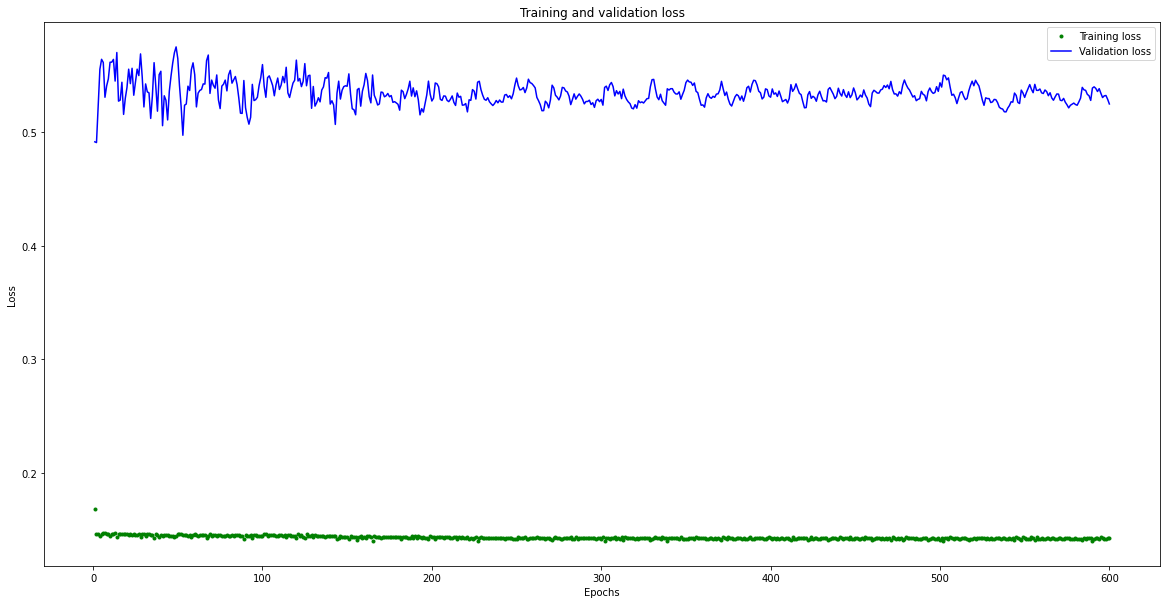

[20.0, 10.0]


In [98]:
plt.rcParams["figure.figsize"] = (20,10)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

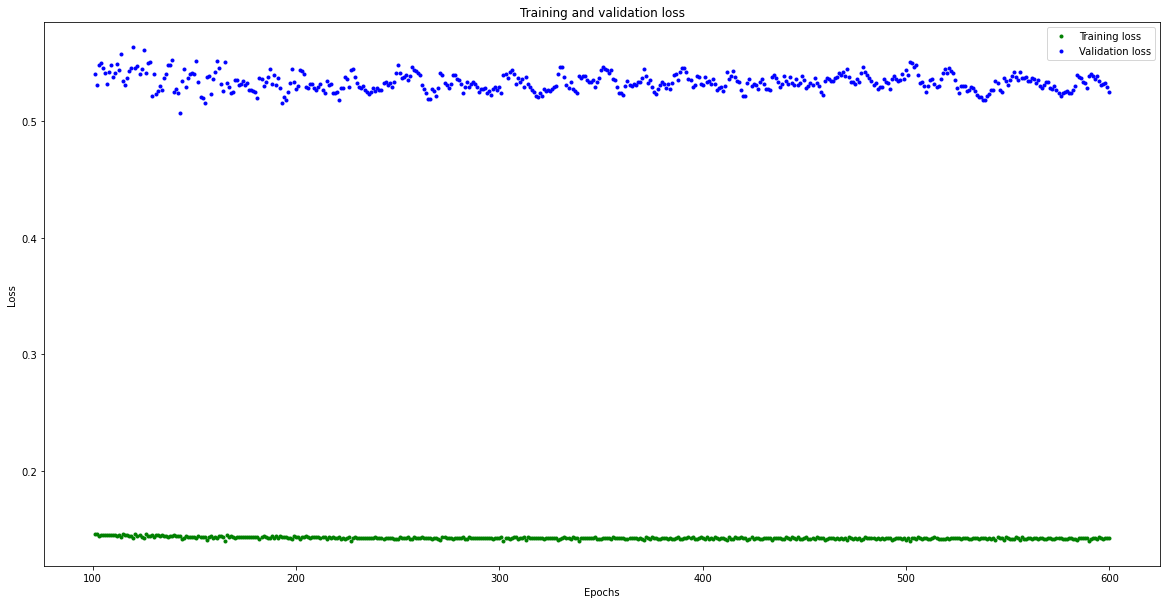

In [99]:
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

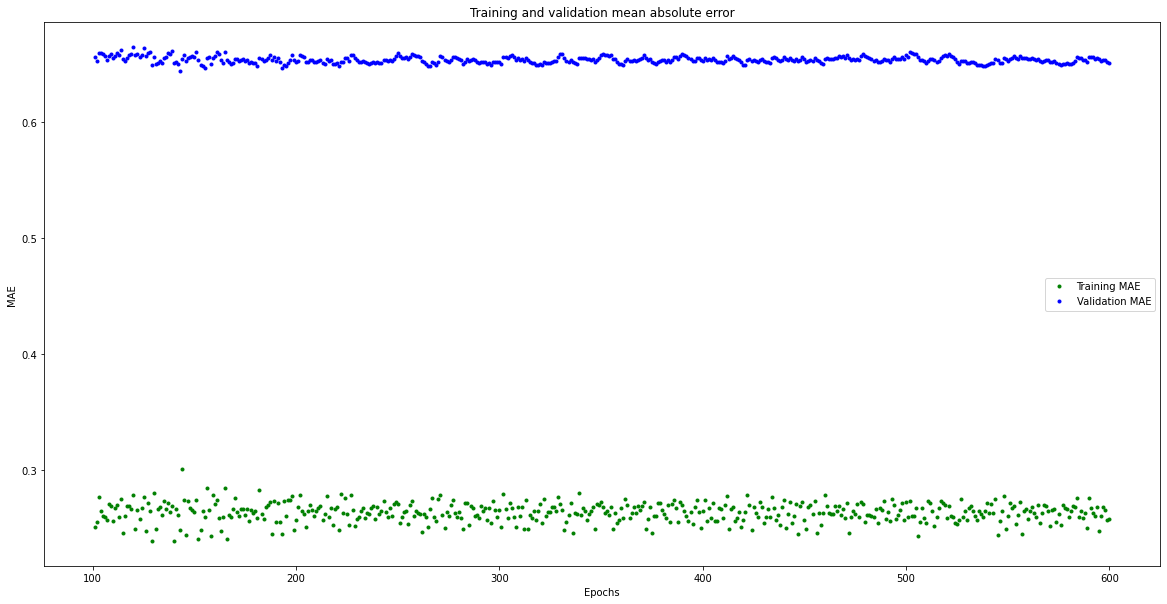

In [100]:
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

predictions =
 [[0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]
 [0.9 0.1]]
actual =
 [[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


ValueError: x has 714 columns but y has 2 columns

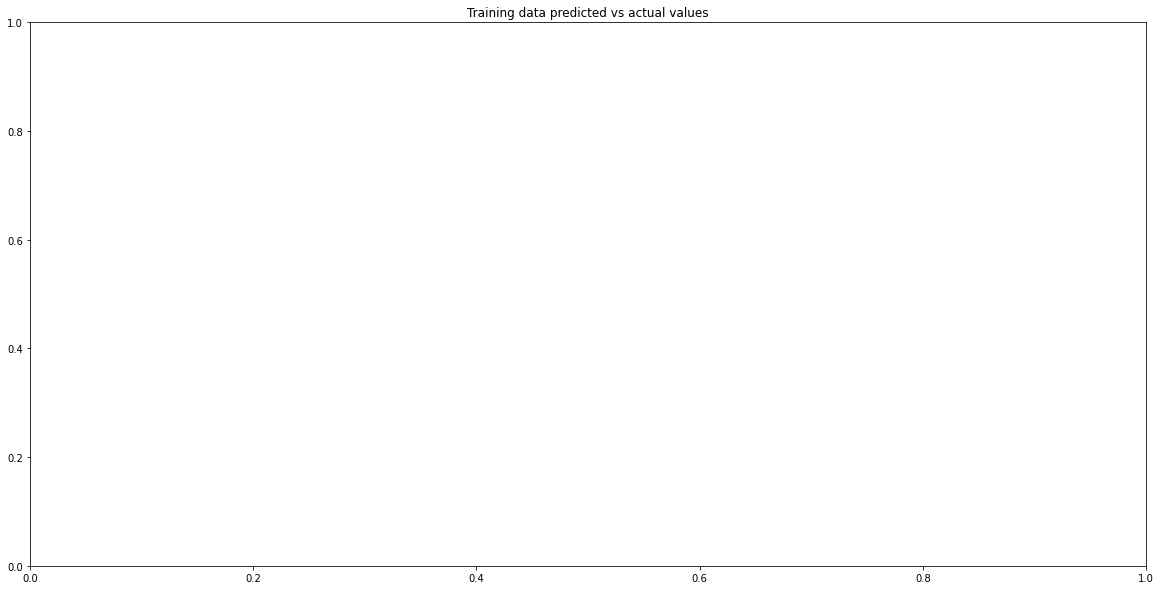

In [101]:
predictions = model.predict(inputs_test)
print("predictions =\n", np.round(predictions, decimals=1))
print("actual =\n", outputs_test)
plt.clf() 
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()



In [102]:
# Convert the model to the TensorFlow Lite 
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

open("aaaabc_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("123abc_model.tflite")
print("aaaabc_model is %d bytes" % basic_model_size)



INFO:tensorflow:Assets written to: C:\Users\ronan\AppData\Local\Temp\tmpox0db2kx\assets


INFO:tensorflow:Assets written to: C:\Users\ronan\AppData\Local\Temp\tmpox0db2kx\assets


aaaabc_model is 60444 bytes


In [ ]:
!echo "const unsigned char model[] = {" > model.h
!cat facetouch_model.tflite  | gvim82   >> model.h
!echo "};"                              >> model.h



import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")


'cat' is not recognized as an internal or external command,
operable program or batch file.


Header file, model.h, is 72 bytes.
